**(c)** Perform Forwards Stepwise and Backward Elimination procedures. What are the resulting models?

In [1]:
library(MASS)

In [12]:
bodyfat_data = read.csv("C:/Users/piotr/Desktop/Exam_Multivariate/bodyfat2.csv")

In [20]:
# Fit the full model 
full_model <- lm(bodyfat ~. - density, data = bodyfat_data)
# Stepwise regression model
backward_model <- step(full_model, direction = "backward", 
                      trace = FALSE)

min_model = lm(bodyfat ~ 1, data = bodyfat_data)

forward_model <- step(min_model, direction = "forward", 
                      trace = FALSE, scope = ~age + weight + height + neck + chest + abdomen + hip + thigh + knee + ankle + biceps + forearm + wrist)

summary(backward_model)
summary(forward_model)


Call:
lm(formula = bodyfat ~ age + weight + neck + abdomen + hip + 
    thigh + forearm + wrist, data = bodyfat_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9757  -2.9937  -0.1644   2.9766  10.2244 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -22.65637   11.71385  -1.934  0.05426 .  
age           0.06578    0.03078   2.137  0.03356 *  
weight       -0.08985    0.03991  -2.252  0.02524 *  
neck         -0.46656    0.22462  -2.077  0.03884 *  
abdomen       0.94482    0.07193  13.134  < 2e-16 ***
hip          -0.19543    0.13847  -1.411  0.15940    
thigh         0.30239    0.12904   2.343  0.01992 *  
forearm       0.51572    0.18631   2.768  0.00607 ** 
wrist        -1.53665    0.50939  -3.017  0.00283 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.282 on 243 degrees of freedom
Multiple R-squared:  0.7466,	Adjusted R-squared:  0.7382 
F-statistic: 89.47 on 8 and 243 DF,  p-


Call:
lm(formula = bodyfat ~ abdomen + weight + wrist + forearm + neck + 
    age + thigh + hip, data = bodyfat_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9757  -2.9937  -0.1644   2.9766  10.2244 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -22.65637   11.71385  -1.934  0.05426 .  
abdomen       0.94482    0.07193  13.134  < 2e-16 ***
weight       -0.08985    0.03991  -2.252  0.02524 *  
wrist        -1.53665    0.50939  -3.017  0.00283 ** 
forearm       0.51572    0.18631   2.768  0.00607 ** 
neck         -0.46656    0.22462  -2.077  0.03884 *  
age           0.06578    0.03078   2.137  0.03356 *  
thigh         0.30239    0.12904   2.343  0.01992 *  
hip          -0.19543    0.13847  -1.411  0.15940    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.282 on 243 degrees of freedom
Multiple R-squared:  0.7466,	Adjusted R-squared:  0.7382 
F-statistic: 89.47 on 8 and 243 DF,  p-

Which gives for FSS:

**age + weight + neck + abdomen + hip + thigh + forearm + wrist**

And for BSS:

**abdomen + weight + wrist + forearm + neck + age + thigh + hip**

**(e)** Apply LASSO to the bodyfat data set. Indicate the LASSO path and decide on a suitable model. Justify your choice.

In [26]:
library(glmnet)
x = data.matrix(bodyfat_data[,-c(1,2)])
y = bodyfat_data$bodyfat

In [27]:
lasso_model = glmnet(x, y, alpha = 1)

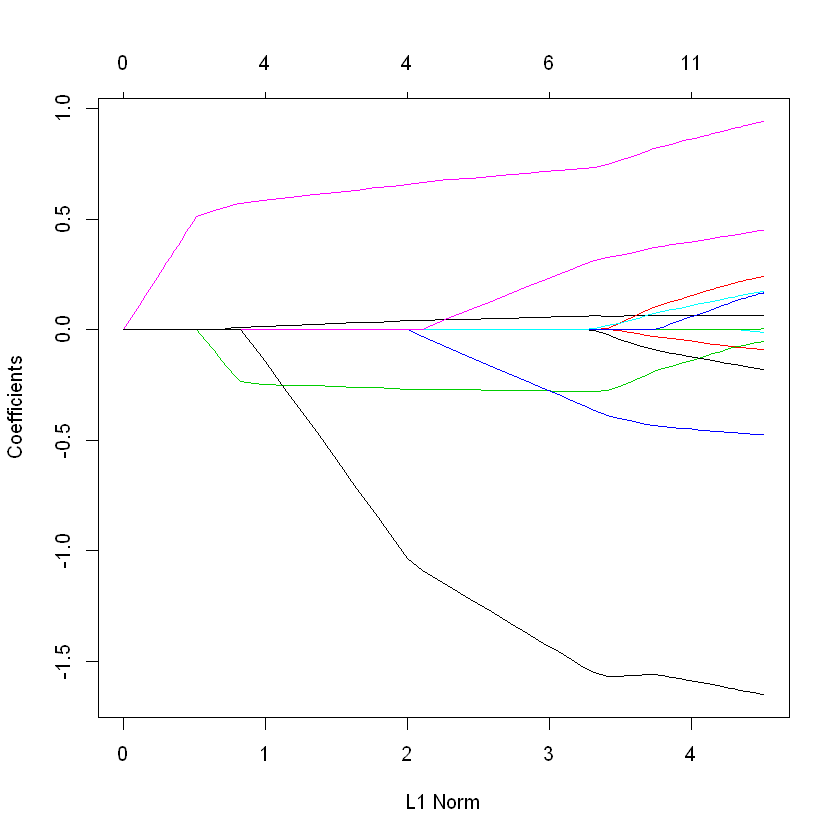

In [29]:
plot(lasso_model)

In [41]:
lambdas = seq(0, 1, by = 0.01)
lasso_cv = cv.glmnet(x, y, alpha = 1, lambda = lambdas)
lasso_cv$lambda.min
best_lasso = glmnet(x, y, alpha = 1, lambda = lasso_cv$lambda.min)

[1] 0.03

In [42]:
coef(best_lasso)

14 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept) -15.24541033
age           0.06363330
weight       -0.07074667
height       -0.09974219
neck         -0.45864705
chest         .         
abdomen       0.89318726
hip          -0.14550317
thigh         0.19001795
knee          .         
ankle         0.10287414
biceps        0.13360216
forearm       0.41736080
wrist        -1.61479034

So using above logic I would just remove **chest** and **knee** from the model. Although I do expect this model to overfit, so maybe choosing model with only 4 or 6 features would be better.